In [ ]:
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Displaying the statistics of the dataset

# dataset visualization
import matplotlib.pyplot as plt
import os
import glob

data_dir = '/content/drive/MyDrive/VehiclesDetectionDataset'

train_dir = data_dir + '/train/images/'
test_dir = data_dir + '/test/images/'
valid_dir = data_dir + '/valid/images/'

print("Number of images in train dataset : ", len(os.listdir(train_dir)))
print("Number of images in test dataset : ", len(os.listdir(test_dir)))
print("Number of images in valid dataset : ", len(os.listdir(valid_dir)))

Number of images in train dataset :  878
Number of images in test dataset :  126
Number of images in valid dataset :  250


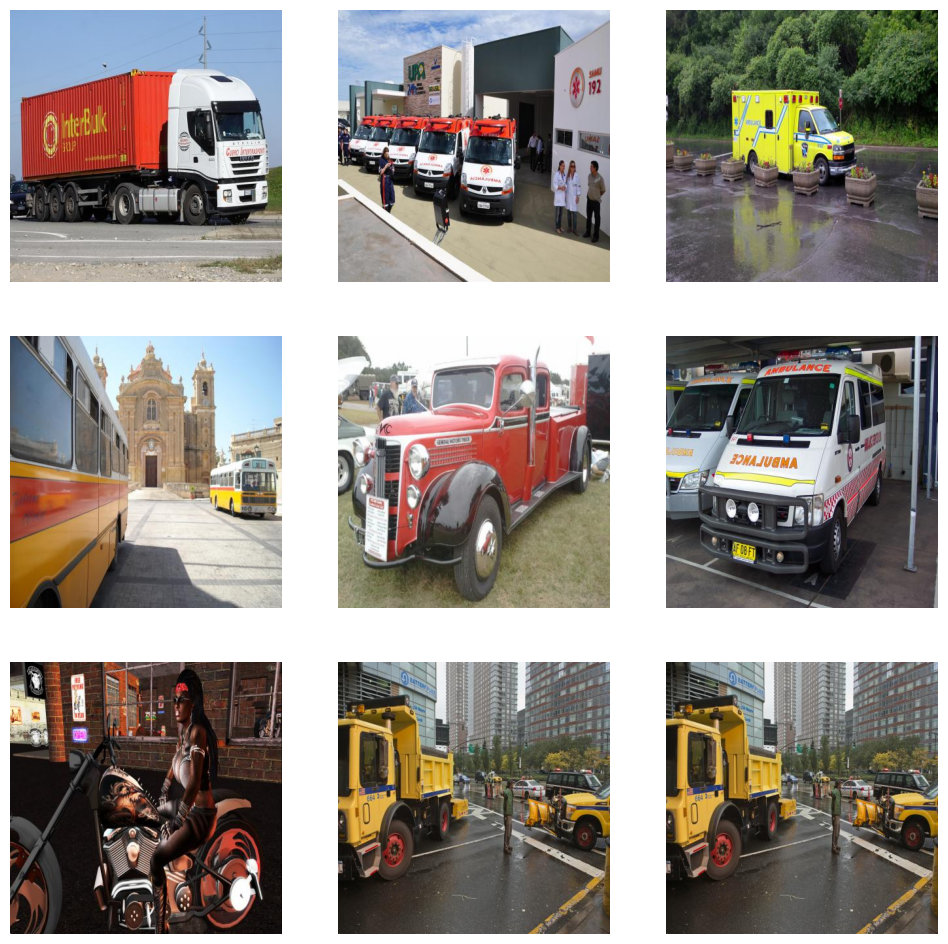

In [ ]:
# Visualizing the dataset images
import matplotlib.pyplot as plt

train_images = os.listdir(train_dir)
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    image = plt.imread(os.path.join(train_dir, train_images[i]))
    plt.imshow(image)
    plt.axis(False)

plt.show()

In [ ]:
# Displaying the image details

image = cv2.imread("/content/drive/MyDrive/VehiclesDetectionDataset/train/images/005980b3a5f93085_jpg.rf.2QZCXGReqcBORWQJKQfO.jpg")

height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 416x416 and 3 channels.


In [ ]:
# Preprocessing the image

def Preprocess(img):
  normalized_img = img.astype('float32')/255.0
  return normalized_img

In [ ]:
#Creating the model for Detection

def yolo_model():
  model = YOLO('yolov10x.pt')
  return model

In [ ]:
model = yolo_model()

100%|██████████| 61.4M/61.4M [00:00<00:00, 119MB/s]


In [ ]:
results = model.train(
    data='/content/drive/MyDrive/VehiclesDetectionDataset/dataset.yaml',
    epochs=100,
    imgsz=640,
    batch=8,        # Lowered batch size
    freeze=10,
    lr0=0.001,
    momentum=0.937,
    weight_decay=0.0005,
    workers=2,
    augment=True
)


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10x.pt, data=/content/drive/MyDrive/VehiclesDetectionDataset/dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

train: Scanning /content/drive/MyDrive/VehiclesDetectionDataset/train/labels.cache... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/VehiclesDetectionDataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 185 weight(decay=0.0), 198 weight(decay=0.0005), 197 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.51G      2.163      5.869      2.957         27        640: 100%|██████████| 110/110 [00:53<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.50it/s]

                   all        250        454       0.38      0.471      0.379       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.54G      2.616      3.947      3.204         25        640: 100%|██████████| 110/110 [00:50<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]

                   all        250        454      0.177      0.405       0.19     0.0843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.63G      2.566      3.614      3.219         30        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454       0.58      0.525      0.532      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.72G      2.612      3.217      3.161         23        640: 100%|██████████| 110/110 [00:49<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.503      0.583       0.58      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       5.8G      2.482      3.023      3.049         23        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.557      0.423      0.482      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.89G      2.366      2.887      2.947         34        640: 100%|██████████| 110/110 [00:49<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.583      0.568      0.579      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.89G      2.308      2.788      2.956         26        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.641      0.576      0.662      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.89G      2.206      2.616      2.872         29        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.589      0.651      0.663      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.89G       2.15      2.444      2.855         18        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.713      0.637      0.669      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.89G      2.087      2.312      2.793         17        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.672      0.672      0.654      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.89G      2.071       2.24      2.787         13        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.77it/s]

                   all        250        454      0.599      0.578      0.624      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.89G      1.993      2.246      2.704         23        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.672       0.58       0.66      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.89G      1.998      2.184      2.687         32        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.608      0.647      0.654       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.89G      1.928      2.055      2.675         35        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.631      0.635      0.666      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.89G      1.897      1.983      2.632         25        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.781      0.621      0.728      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.89G      1.819      1.872      2.589         25        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.78it/s]

                   all        250        454      0.675      0.653      0.696      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.89G       1.82      1.841      2.593         29        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.663      0.625      0.685      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.89G      1.773      1.788      2.559         21        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.732      0.652      0.742      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.89G      1.676      1.689      2.482         25        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.642      0.728      0.726      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.89G      1.673      1.657      2.475         21        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.651      0.645      0.687      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.89G      1.629      1.568      2.474         13        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454       0.79      0.593      0.737      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.89G      1.638      1.592      2.447         15        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]

                   all        250        454      0.755       0.65      0.722      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.89G      1.612       1.54      2.412         22        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.76it/s]

                   all        250        454      0.697      0.629      0.703      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.89G       1.55        1.5      2.412         16        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.641      0.673      0.688       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.89G       1.53      1.517      2.393         19        640: 100%|██████████| 110/110 [00:50<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.727      0.582      0.686      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.89G      1.517      1.512      2.391         18        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.747      0.541      0.683      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.89G      1.485      1.455       2.35         27        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.656      0.645       0.69      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.89G       1.46      1.416      2.363         28        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.636      0.674       0.68      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.89G      1.456      1.359       2.33         30        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.77it/s]

                   all        250        454      0.656      0.648      0.687      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.89G      1.423      1.334      2.329         28        640: 100%|██████████| 110/110 [00:51<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.715       0.64      0.725      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.89G      1.374      1.318      2.317         20        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.647       0.67      0.713      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.89G      1.366      1.313      2.282         29        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.78it/s]

                   all        250        454       0.64      0.579      0.627      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.89G      1.365      1.249      2.263         13        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.78it/s]

                   all        250        454      0.556      0.678      0.655      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.94G      1.348      1.259      2.278         26        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]

                   all        250        454      0.674      0.638      0.706      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.94G      1.284      1.206      2.248         23        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.77it/s]

                   all        250        454      0.651      0.632      0.702      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.94G      1.287      1.164      2.225         13        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.737      0.651      0.725      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.94G      1.272      1.121       2.21         26        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.638      0.694      0.715      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.94G      1.262      1.185       2.21         20        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.648      0.666      0.733      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.94G      1.257      1.151      2.232         20        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.613      0.678      0.653      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.94G      1.217      1.126      2.203         16        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.692      0.614      0.699      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.94G      1.229      1.102      2.186         20        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.733      0.598      0.698      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.94G      1.204      1.089      2.155         19        640: 100%|██████████| 110/110 [00:50<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]

                   all        250        454      0.753      0.567      0.702       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.94G      1.177      1.062      2.165         23        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.747      0.608      0.726      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.94G      1.159      1.008      2.156         18        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.764      0.602      0.719      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.94G      1.178      1.092       2.15         25        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454        0.6      0.667      0.672      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.94G      1.127     0.9907      2.141         23        640: 100%|██████████| 110/110 [00:50<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.626      0.663       0.68      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.94G      1.128     0.9906      2.123         18        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.708      0.604      0.685      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.94G      1.162       1.05      2.173         21        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.668      0.675      0.711      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.94G      1.096     0.9906      2.116         24        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.764      0.635      0.721      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.94G      1.073     0.9615      2.096         22        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.727       0.62      0.672      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.94G      1.066     0.9629      2.099         24        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.78it/s]

                   all        250        454      0.687      0.696      0.699      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.94G      1.056     0.9294       2.08         24        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.751      0.543      0.675      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.94G      1.041     0.9366      2.099         29        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.656      0.599      0.663      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.94G      1.036     0.9411      2.094         29        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.635       0.71      0.704      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.94G      1.016     0.8908      2.047         16        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.683      0.651      0.703      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.94G      1.029     0.9145      2.082         20        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.741      0.623      0.689      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.94G      1.027     0.9019      2.069         35        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.715      0.619      0.687      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.94G     0.9734     0.8717      2.064         28        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.729      0.607      0.679      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.94G     0.9554     0.8559      2.036         24        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.693      0.645       0.69      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.94G     0.9678     0.8735      2.031         13        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.615      0.659      0.688      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.94G     0.9574     0.8502       2.04         23        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.741      0.551      0.664      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.94G     0.9957     0.8757      2.043         25        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.771      0.585      0.673      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.94G     0.9405     0.8387      2.037         24        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.78it/s]

                   all        250        454      0.727      0.579      0.684      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.94G     0.9377      0.834      2.034         11        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454       0.75      0.603      0.683      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.94G     0.8931     0.7692          2         24        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.76it/s]

                   all        250        454      0.736      0.672      0.724      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.94G     0.9061     0.7994      2.021         14        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.745      0.664      0.733      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.94G     0.9064     0.8262      2.016         28        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.728      0.631      0.703      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.94G     0.8983     0.7722      2.007         26        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.734      0.587      0.665      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.94G     0.8344     0.7169      1.963         23        640: 100%|██████████| 110/110 [00:49<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.672      0.641      0.708      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.94G     0.8437      0.743      1.986         22        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.77it/s]

                   all        250        454       0.73      0.654      0.712      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.94G     0.8623     0.7346       1.97         27        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.741      0.616      0.737      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.94G     0.8463     0.7269      1.977         14        640: 100%|██████████| 110/110 [00:49<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.644      0.657       0.68      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.94G     0.8558     0.7244      1.976         20        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.676      0.625      0.681      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.94G     0.8403      0.731      1.971         20        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.641      0.666      0.684      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.94G     0.8057     0.6937      1.961         21        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.781      0.606      0.712      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.94G     0.8094     0.7082      1.966         22        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.741      0.629        0.7      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.94G     0.8087     0.7193       1.95         16        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454        0.8      0.555      0.691      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.94G     0.8046     0.6915      1.956         33        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.699       0.62      0.691       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.94G     0.7628     0.6664      1.936         21        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454       0.77      0.571      0.691      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.94G     0.7735     0.6522      1.936         21        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.703      0.674      0.702      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.94G     0.7899     0.6819      1.948         23        640: 100%|██████████| 110/110 [00:50<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.696      0.625      0.684      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.94G     0.7487     0.6474       1.93         19        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.713      0.576       0.67      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.94G     0.7365     0.6405      1.899         22        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.77it/s]

                   all        250        454      0.758      0.571       0.69      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.94G     0.7631     0.6543      1.931         21        640: 100%|██████████| 110/110 [00:49<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.651      0.616      0.685      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.94G     0.7393     0.6469      1.931         25        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.662      0.643      0.679      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.94G     0.7376      0.636      1.926         11        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]

                   all        250        454      0.652      0.639      0.676      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.94G     0.7115     0.6187      1.909         23        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.683      0.646      0.693      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.94G     0.7113     0.6276      1.897         18        640: 100%|██████████| 110/110 [00:49<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.771      0.587      0.676      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.94G     0.7275     0.6405      1.908         37        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.78it/s]

                   all        250        454      0.762      0.605      0.693      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.94G     0.7116     0.5859      1.906         21        640: 100%|██████████| 110/110 [00:51<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.682       0.64      0.686      0.527


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.94G     0.5389     0.3752      1.758         14        640: 100%|██████████| 110/110 [00:49<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.637      0.646      0.691      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.94G     0.5241     0.3619      1.732         10        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.79it/s]

                   all        250        454      0.713      0.606      0.685      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.94G     0.5163     0.3392      1.732          9        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]

                   all        250        454      0.771      0.558       0.68      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.94G     0.5037      0.358       1.72          9        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.716      0.611      0.688      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.94G      0.493     0.3178      1.726         10        640: 100%|██████████| 110/110 [00:48<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]

                   all        250        454      0.718       0.61      0.694      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.94G     0.4849     0.3072      1.708         11        640: 100%|██████████| 110/110 [00:48<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.765      0.605      0.708      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.94G     0.5117     0.3506      1.744          6        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.726       0.63      0.704      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.94G     0.4899     0.3292      1.726         10        640: 100%|██████████| 110/110 [00:48<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.80it/s]

                   all        250        454      0.719      0.602      0.684      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.94G     0.4797     0.3149      1.717          8        640: 100%|██████████| 110/110 [00:48<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.78it/s]

                   all        250        454      0.746      0.595       0.69      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.94G     0.4775     0.3355      1.698          7        640: 100%|██████████| 110/110 [00:48<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.81it/s]

                   all        250        454      0.734      0.613      0.696      0.537



100 epochs completed in 1.700 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 64.1MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 64.1MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10x summary (fused): 215 layers, 31,593,710 parameters, 0 gradients, 169.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/16 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▋         | 1/16 [00:00<00:08,  1.70it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 2/16 [00:01<00:08,  1.59it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  19%|█▉        | 3/16 [00:02<00:09,  1.34it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 4/16 [00:02<00:08,  1.34it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  31%|███▏      | 5/16 [00:03<00:08,  1.31it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  38%|███▊      | 6/16 [00:04<00:07,  1.43it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▍     | 7/16 [00:04<00:05,  1.55it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 8/16 [00:05<00:04,  1.62it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▋    | 9/16 [00:05<00:04,  1.70it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  62%|██████▎   | 10/16 [00:06<00:03,  1.74it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  69%|██████▉   | 11/16 [00:06<00:02,  1.78it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 12/16 [00:07<00:02,  1.79it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  81%|████████▏ | 13/16 [00:08<00:01,  1.81it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  88%|████████▊ | 14/16 [00:08<00:01,  1.81it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  94%|█████████▍| 15/16 [00:09<00:00,  1.82it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.69it/s]


                   all        250        454      0.791      0.593      0.738      0.557
             Ambulance         50         64      0.831      0.844      0.939      0.829
                   Bus         30         46      0.676      0.739      0.777      0.657
                   Car         90        238      0.806      0.455      0.642      0.434
            Motorcycle         42         46      0.783      0.696      0.732      0.446
                 Truck         38         60      0.858      0.233      0.599      0.421
Speed: 0.3ms preprocess, 30.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train6


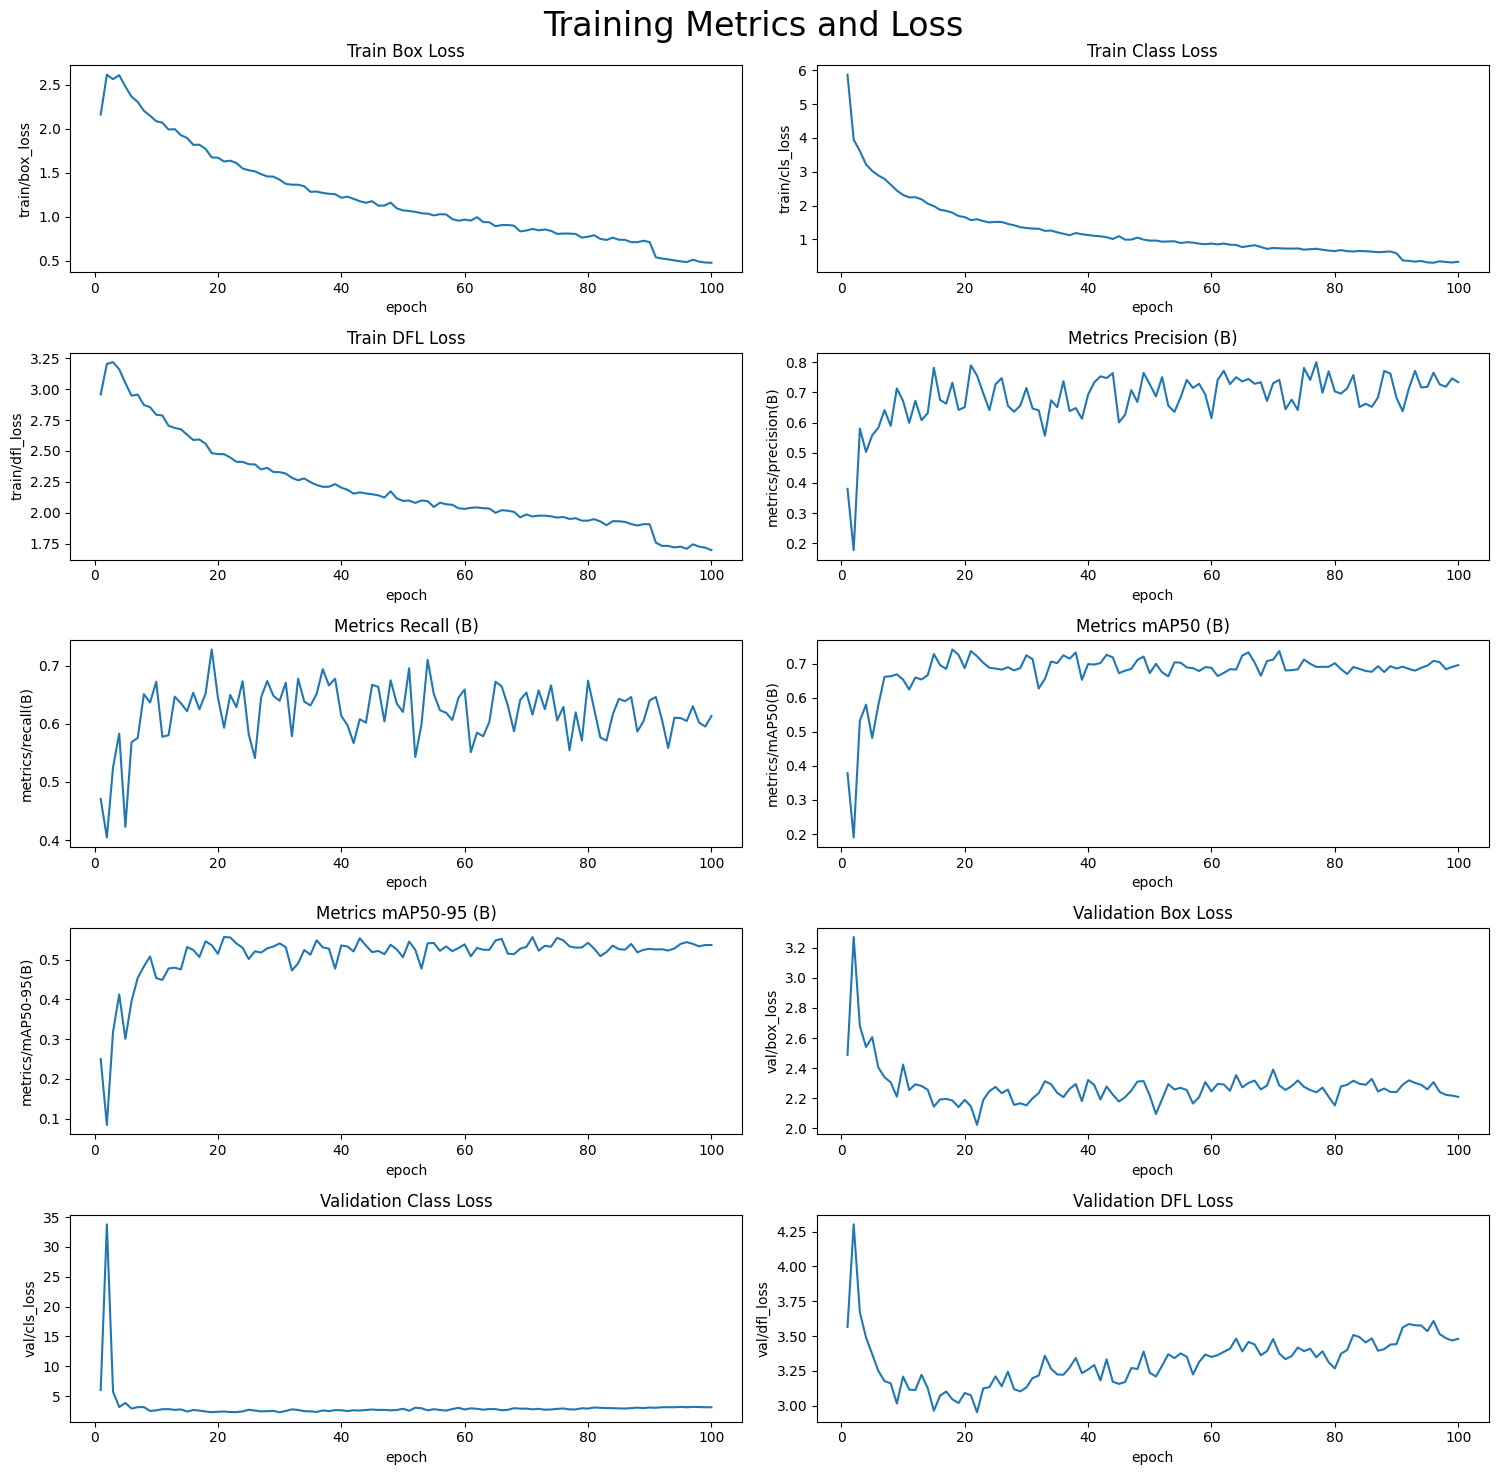

In [ ]:
%matplotlib inline
df = pd.read_csv('/content/runs/detect/train6/results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn

sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/runs/detect/train6/weights/best.pt')

# # Evaluating the model on the test dataset
# metrics = model.val(conf = 0.25, split = 'test')

(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

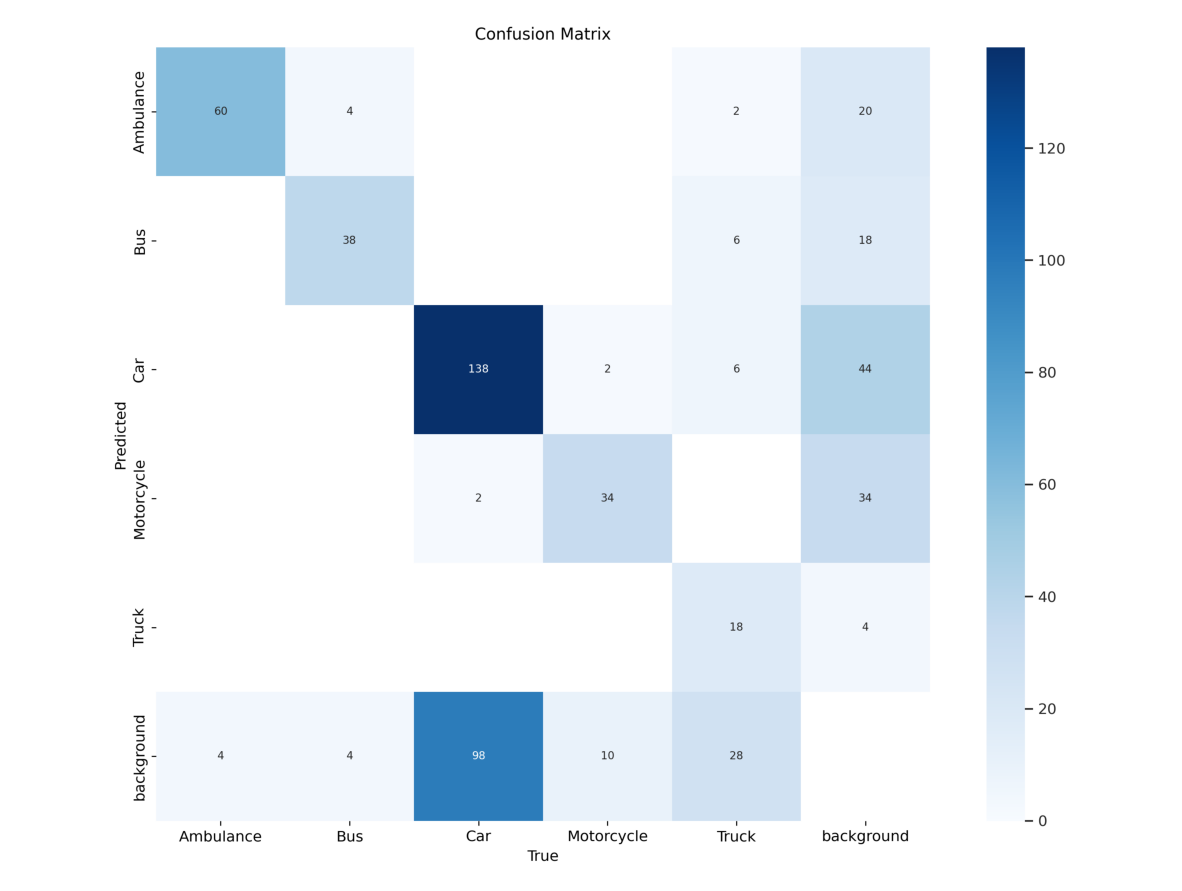

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/runs/detect/train6/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off')

In [ ]:
# Function to perform Airport detections
def Autonomus_vechiles(img):
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 384x640 2 Cars, 51.7ms
Speed: 2.8ms preprocess, 51.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


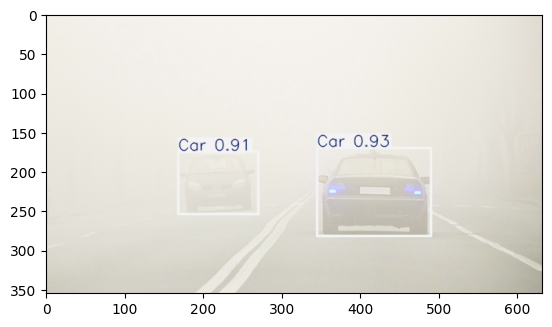

In [ ]:
img_path = '/content/1ef41db5-9ce9-6b24-b85b-61b29c79186a.jpeg'
img = plt.imread(img_path)
result = Autonomus_vechiles(img)
plt.imshow(result)

In [ ]:
import cv2
import numpy as np
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os

In [ ]:
 #✅ Compute Dark Channel
def dark_channel(image, window_size=35):
    min_channel = np.min(image, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (window_size, window_size))
    return cv2.erode(min_channel, kernel)

In [ ]:
# ✅ Estimate Atmospheric Light (A)
def estimate_atmospheric_light(image, dark_channel):
    h, w = image.shape[:2]
    num_pixels = h * w
    num_brightest = int(num_pixels * 0.005)  # Top 0.1% brightest pixels

    # Get indices of brightest pixels in dark channel
    flat_dark = dark_channel.flatten()
    brightest_indices = np.argsort(flat_dark)[-num_brightest:]

    # Compute atmospheric light as the mean of brightest pixels in original image
    A = np.mean(image.reshape(-1, 3)[brightest_indices], axis=0)
    return A

In [ ]:
# ✅ Compute Transmission Map
def compute_transmission(image, A, beta=0.985):
    norm_image = image / A  # Normalize by estimated atmospheric light
    dark = dark_channel(norm_image)
    transmission = 1 - beta * dark
    return np.clip(transmission, 0.1, 1.0)  # Prevent complete black regions

In [ ]:
# ✅ Manual Guided Filter Implementation
def guided_filter(I, p, radius, eps):
    mean_I = cv2.boxFilter(I, cv2.CV_64F, (radius, radius))
    mean_p = cv2.boxFilter(p, cv2.CV_64F, (radius, radius))
    corr_I = cv2.boxFilter(I * I, cv2.CV_64F, (radius, radius))
    corr_Ip = cv2.boxFilter(I * p, cv2.CV_64F, (radius, radius))

    var_I = corr_I - mean_I * mean_I
    cov_Ip = corr_Ip - mean_I * mean_p

    a = cov_Ip / (var_I + eps)
    b = mean_p - a * mean_I

    mean_a = cv2.boxFilter(a, cv2.CV_64F, (radius, radius))
    mean_b = cv2.boxFilter(b, cv2.CV_64F, (radius, radius))

    q = mean_a * I + mean_b
    return q

In [ ]:
# ✅ Apply Guided Filter for Transmission Refinement
def refine_transmission(image, transmission, radius=40, eps=1e-4):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) / 255.0
    return guided_filter(gray, transmission, radius, eps)

In [ ]:

# ✅ Recover Haze-Free Image
def recover_image(image, transmission, A, gamma=0.95):
    J = (image - A) / transmission[:, :, np.newaxis] + A
    J = np.clip(J, 0, 1) ** gamma  # Apply gamma correction
    return (J * 255).astype(np.uint8)

In [ ]:
 #✅ Full Non-Local Image Dehazing Function
def non_local_dehazing(image):
    image = image.astype(np.float32) / 255.0  # Normalize image
    dark = dark_channel(image)
    A = estimate_atmospheric_light(image, dark)
    transmission = compute_transmission(image, A)
    transmission_refined = refine_transmission(image, transmission)
    dehazed = recover_image(image, transmission_refined, A)
    return dehazed


In [ ]:
# ✅ Load and Dehaze an Image
def load_and_dehaze(image_path):
    if not os.path.exists(image_path):
        raise ValueError(f"File not found: {image_path}")

    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for display
    dehazed_image = non_local_dehazing(image_rgb)
    return image_rgb, dehazed_image


In [ ]:
# ✅ Load YOLOv10 Model
def load_yolo_model(model_path='/content/runs/detect/train6/weights/best.pt'):
    return YOLO(model_path)

# ✅ Perform Object Detection
def detect_objects(model, image):
    results = model(image, conf=0.35)
    return results


In [ ]:
# ✅ Draw YOLOv10 Detections with Larger Labels
def draw_detections(image, results):
    image_with_boxes = image.copy()

    for result in results:
        for box, cls, conf in zip(result.boxes.xyxy, result.boxes.cls, result.boxes.conf):
            x1, y1, x2, y2 = map(int, box)
            class_id = int(cls)
            confidence = float(conf)
            label = f"{result.names[class_id]} {confidence:.2f}"

            # Draw bounding box
            cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (255, 0, 0), 3)
            (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
            cv2.rectangle(image_with_boxes, (x1, y1 - h - 5), (x1 + w, y1), (255, 0, 0), -1)
            cv2.putText(image_with_boxes, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    return image_with_boxes

In [ ]:
# ✅ Display Results
def display_results(original, dehazed, detected):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(dehazed)
    plt.title("Dehazed Image (NLD)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(detected)
    plt.title("Detection Results (YOLOv10)")
    plt.axis("off")

    plt.show()


In [ ]:
# ✅ Main Function
def main(image_path='/content/1ef41db5-9ce9-6b24-b85b-61b29c79186a.jpeg', model_path='/content/runs/detect/train6/weights/best.pt'):
    # Load and Dehaze Image
    image, dehazed_image = load_and_dehaze(image_path)

    # Load YOLOv10 Model
    model = load_yolo_model(model_path)

    # Detect Objects on Dehazed Image
    results = detect_objects(model, dehazed_image)

    # Draw Detections
    detected_image = draw_detections(dehazed_image, results)

    # Display Results
    display_results(image, dehazed_image, detected_image)


0: 384x640 2 Cars, 51.5ms
Speed: 2.3ms preprocess, 51.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


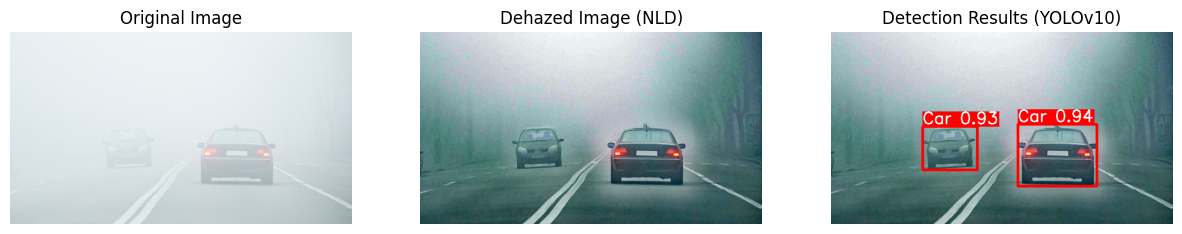

In [ ]:
main()